In [1]:
import os  # Operating system interactions

import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # High-level data visualization based on matplotlib
from scipy import stats

pd.set_option('display.max_rows', None)  # Display all rows in pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame

from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import OneHotEncoder  # Encoding categorical features
from sklearn.compose import ColumnTransformer  # Applying transformers to columns
from sklearn.pipeline import Pipeline  # Assembling steps for cross-validation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Machine learning algorithm for classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score  # Cross-validation for evaluating scores


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [94]:
test=pd.read_csv('test.csv')

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(140700, 20)
(93800, 19)


In [4]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
# Find all duplicates
all_duplicates = train_df[train_df.duplicated(keep=False)]
print(all_duplicates)

Empty DataFrame
Columns: [id, Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


In [6]:
# Count duplicates
duplicate_count = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [7]:
# Count duplicates
duplicate_count = test_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [8]:
def nullpercent(df):
    value=(df.isnull().sum()/df.shape[0])*100
    print(value)

In [9]:
nullpercent(train_df)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [10]:
nullpercent(test_df)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.260128
Academic Pressure                        79.992537
Work Pressure                            20.019190
CGPA                                     79.993603
Study Satisfaction                       79.992537
Job Satisfaction                         20.014925
Sleep Duration                            0.000000
Dietary Habits                            0.005330
Degree                                    0.002132
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
dtype: float64


In [11]:
# Include NaN values, zeros, and negatives in value counts
train_df['Academic Pressure'].value_counts(dropna=False)

Academic Pressure
NaN    112803
3.0      7463
5.0      6296
4.0      5158
1.0      4801
2.0      4179
Name: count, dtype: int64

In [12]:
train_df['CGPA'].value_counts(dropna=False)

CGPA
NaN        112802
8.0400        822
9.9600        425
5.7400        410
8.9500        371
9.2100        343
7.2500        339
7.0900        320
7.8800        318
9.4400        317
8.9100        276
9.9300        274
7.7700        269
8.7400        267
7.1000        252
9.7200        251
5.6400        247
9.3900        243
6.9900        242
6.3700        238
7.5300        234
6.7800        232
9.2400        224
8.5900        220
5.8500        216
6.1600        215
8.5800        209
5.1600        209
7.9400        208
5.8800        207
8.1700        198
5.3200        197
8.2400        195
5.5600        178
9.5600        176
8.1400        176
6.1000        169
5.1200        167
5.5700        164
8.9000        164
5.3700        159
9.7100        157
6.0000        154
6.8300        153
9.4100        153
6.8900        153
9.8900        151
9.6300        150
6.2500        147
5.8200        144
7.0400        143
6.7500        143
8.9600        142
9.6000        142
8.7300        142
9.790

In [13]:
train_df['Study Satisfaction'].value_counts(dropna=False)

Study Satisfaction
NaN    112803
4.0      6360
2.0      5840
3.0      5823
1.0      5451
5.0      4423
Name: count, dtype: int64

In [14]:
train_df['Job Satisfaction'].value_counts(dropna=False)

Job Satisfaction
NaN    27910
2.0    24783
5.0    22812
1.0    22324
3.0    21951
4.0    20920
Name: count, dtype: int64

In [15]:
train_df['Profession'].value_counts(dropna=False)

Profession
NaN                       36630
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 13

In [16]:
train_df['Working Professional or Student'].value_counts(dropna=False)

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [17]:
train_df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [18]:
import re

def extract_numeric_duration(value):
    if isinstance(value, str):
        # Extract numeric ranges or single values
        match = re.findall(r'\d+\.?\d*', value)  # Find all numbers
        if len(match) == 1:
            return float(match[0])  # Single numeric value
        elif len(match) == 2:
            # Average for a range (e.g., 7-8 hours → (7+8)/2)
            return (float(match[0]) + float(match[1])) / 2
    return np.nan  # Set non-numeric entries to NaN

In [19]:
# Apply function to column
train_df['Numeric Sleep Duration'] = train_df['Sleep Duration'].apply(extract_numeric_duration)

In [20]:
train_df.head(50)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0,5.5
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0,7.5
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0,7.5
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,5.5
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0,5.5


In [21]:
train_df['Numeric Sleep Duration'].value_counts(dropna=False)

Numeric Sleep Duration
5.0     38790
7.5     36970
8.0     32728
5.5     32142
3.5        16
NaN        12
6.5         8
4.5         8
7.0         6
2.5         5
45.0        2
10.5        2
8.5         2
10.0        2
49.0        1
35.5        1
42.5        1
2.0         1
60.5        1
1.5         1
46.5        1
Name: count, dtype: int64

In [22]:
# Exclude values greater than 10 hours and less than 4.5 hours for mean calculation
valid_values = train_df[(train_df['Numeric Sleep Duration'] <= 10) & (train_df['Numeric Sleep Duration'] >= 4.5)]

# Calculate mean of valid values
mean_value = valid_values['Numeric Sleep Duration'].mean()

# Replace values where Numeric Sleep Duration > 10 or < 4.5 with the calculated mean
train_df['Numeric Sleep Duration'] = train_df['Numeric Sleep Duration'].apply(
    lambda x: mean_value if x > 10 or x < 4.5 else x
)

In [23]:
train_df['Numeric Sleep Duration'].value_counts(dropna=False)

Numeric Sleep Duration
5.000000     38790
7.500000     36970
8.000000     32728
5.500000     32142
6.469664        32
NaN             12
6.500000         8
4.500000         8
7.000000         6
8.500000         2
10.000000        2
Name: count, dtype: int64

In [24]:
# Calculate the mean of the column, ignoring NaN values
mean_value = train_df['Numeric Sleep Duration'].mean()

# Replace NaN values with the calculated mean
train_df['Numeric Sleep Duration'] = train_df['Numeric Sleep Duration'].fillna(mean_value)

In [25]:
train_df['Numeric Sleep Duration'].value_counts(dropna=False)

Numeric Sleep Duration
5.000000     38790
7.500000     36970
8.000000     32728
5.500000     32142
6.469664        32
6.469664        12
6.500000         8
4.500000         8
7.000000         6
8.500000         2
10.000000        2
Name: count, dtype: int64

In [26]:
test_df['Numeric Sleep Duration'] = test_df['Sleep Duration'].apply(extract_numeric_duration)

In [27]:
test_df['Numeric Sleep Duration'].value_counts(dropna=False)

Numeric Sleep Duration
5.0     25664
7.5     24492
8.0     22191
5.5     21404
6.5         7
4.5         7
8.5         6
3.5         5
NaN         5
7.0         4
2.5         4
62.5        2
1.5         2
0.0         1
48.5        1
20.5        1
2.0         1
6.0         1
10.0        1
9.5         1
Name: count, dtype: int64

In [28]:
# Replace values where Numeric Sleep Duration > 10 or < 4.5 with the calculated mean
test_df['Numeric Sleep Duration'] = test_df['Numeric Sleep Duration'].apply(
    lambda x: mean_value if x > 10 or x < 4.5 else x
)

In [29]:
# Replace NaN values with the calculated mean
test_df['Numeric Sleep Duration'] = test_df['Numeric Sleep Duration'].fillna(mean_value)

In [30]:
test_df['Numeric Sleep Duration'].value_counts(dropna=False)

Numeric Sleep Duration
5.000000     25664
7.500000     24492
8.000000     22191
5.500000     21404
6.469664        22
6.500000         7
4.500000         7
8.500000         6
7.000000         4
6.000000         1
10.000000        1
9.500000         1
Name: count, dtype: int64

In [31]:
nullpercent(train_df)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [32]:
# Drop the 'Sleep Duration' column from the DataFrame
train_df = train_df.drop(columns=['Sleep Duration'])
test_df = test_df.drop(columns=['Sleep Duration'])

In [33]:
train_df['Profession'].value_counts(dropna=False)

Profession
NaN                       36630
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 13

In [34]:
data = [
    "Student", "Academic", "Unemployed", "Profession", "Yogesh", 
    "BCA", "MBA", "LLM", "PhD", np.nan, "Analyst", "Pranav", 
    "Visakhapatnam", "M.Ed", "Moderate", "Nagpur", "B.Ed", 
    "Unveil", "BBA", "MBBS", "Working Professional", "Medical Doctor", 
    "City Manager", "FamilyVirar", "Dev", "BE", "B.Com", 
    "Family Consultant", "Yuvraj", "Patna", "Unhealthy", "Surat", 
    "MD", "City Consultant", "No", "MCA", "Surgeon", "M.Tech", 
    "Simran", "B.Pharm", "Name", "Samar", "Manvi", "24th", 
    "ME", "3M", "M.Pharm"
]

In [35]:
# Replace using apply with lambda
train_df["Profession"] = train_df["Profession"].apply(
    lambda x: 'other' if x in data or pd.isna(x) else x
)

In [36]:
train_df['Profession'].value_counts(dropna=False)

Profession
other                     36680
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 13

In [37]:
# Replace using apply with lambda
test_df["Profession"] = test_df["Profession"].apply(
    lambda x: 'other' if x in data or pd.isna(x) else x
)

In [38]:
test_df['Profession'].value_counts(dropna=False)

Profession
other                     24676
Teacher                   16385
Content Writer             5187
Architect                  2982
Consultant                 2920
Pharmacist                 2656
HR Manager                 2601
Doctor                     2198
Business Analyst           2186
Chemist                    1967
Entrepreneur               1935
Chef                       1844
Educational Consultant     1827
Data Scientist             1582
Lawyer                     1497
Researcher                 1496
Pilot                      1448
Customer Support           1422
Marketing Manager          1284
Judge                      1189
Travel Consultant          1188
Manager                    1155
Sales Executive            1139
Plumber                    1123
Electrician                1121
Financial Analyst          1048
Software Engineer          1002
Digital Marketer            942
Civil Engineer              938
UX/UI Designer              915
Finanancial Analyst         8

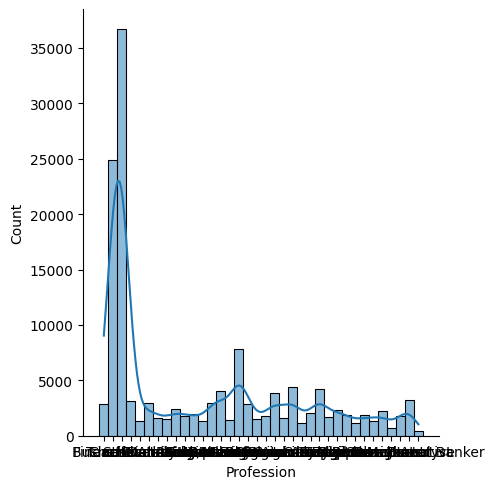

In [39]:
sns.displot(train_df['Profession'], kde=True)

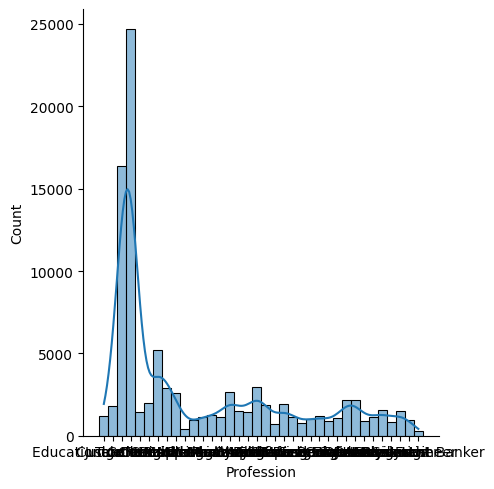

In [40]:
sns.displot(test_df['Profession'], kde=True)

In [41]:
train_df['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

In [42]:
print(nullpercent(train_df))
print('*************************')
print(nullpercent(test_df))

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
Numeric Sleep Duration         

In [43]:
train_df['Academic Pressure'].value_counts(dropna=False)

Academic Pressure
NaN    112803
3.0      7463
5.0      6296
4.0      5158
1.0      4801
2.0      4179
Name: count, dtype: int64

In [44]:
train_df[train_df['Academic Pressure'].isna()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,Healthy,MCA,No,7.0,5.0,No,0,5.5


In [45]:
train_df['Academic Pressure']=train_df['Academic Pressure'].fillna(0)
test_df['Academic Pressure']=test_df['Academic Pressure'].fillna(0)

In [46]:
print(nullpercent(train_df))
print('*************************')
print(nullpercent(test_df))

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                         0.000000
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
Numeric Sleep Duration         

In [47]:
train_df['Work Pressure'].value_counts(dropna=False)

Work Pressure
NaN    27918
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64

In [48]:
train_df[train_df['Work Pressure'].isna()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,other,5.0,NaN,8.97,2.0,NaN,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
8,8,Aishwarya,Female,24.0,Bangalore,Student,other,2.0,NaN,5.90,5.0,NaN,Moderate,BSc,No,3.0,2.0,Yes,0,5.5
26,26,Aditya,Male,31.0,Srinagar,Student,other,3.0,NaN,7.03,5.0,NaN,Healthy,BA,No,9.0,1.0,Yes,0,5.0
30,30,Prisha,Female,28.0,Varanasi,Student,other,3.0,NaN,5.59,2.0,NaN,Moderate,BCA,Yes,4.0,5.0,Yes,1,7.5
32,32,Chhavi,Female,25.0,Jaipur,Student,other,4.0,NaN,8.13,3.0,NaN,Moderate,M.Tech,Yes,1.0,1.0,No,0,5.5


In [49]:
train_df['Work Pressure']=train_df['Work Pressure'].fillna(0)
test_df['Work Pressure']=test_df['Work Pressure'].fillna(0)

In [50]:
train_df['Study Satisfaction'].value_counts(dropna=False)

Study Satisfaction
NaN    112803
4.0      6360
2.0      5840
3.0      5823
1.0      5451
5.0      4423
Name: count, dtype: int64

In [51]:
train_df['Study Satisfaction']=train_df['Study Satisfaction'].fillna(0)
test_df['Study Satisfaction']=test_df['Study Satisfaction'].fillna(0)

In [52]:
train_df['Job Satisfaction']=train_df['Job Satisfaction'].fillna(0)
test_df['Job Satisfaction']=test_df['Job Satisfaction'].fillna(0)

In [53]:
train_df['Dietary Habits'].value_counts(dropna=False)

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
NaN                      4
Yes                      2
No                       2
More Healthy             2
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
No Healthy               1
Hormonal                 1
Electrician              1
1.0                      1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [54]:
values_list = [
    'NaN', 'Yes', 'No', 'More Healthy', 'Class 12', 'Indoor', 'Male', 'Vegas', 'M.Tech',
    'Less Healthy', 'No Healthy', 'Hormonal', 'Electrician', '1.0', 'Mihir', 'Less than Healthy',
    '3', 'Gender', 'BSc', 'Pratham', '2', 'Educational', 'Naina', 'Raghav', 'Vivaan', 
    '5 Unhealthy', 'Soham', '5 Healthy', 'Academic', 'MCA', 'Resistant', 'Mealy', 'Prachi', 
    'Kolkata'
]

In [55]:
# Replace using apply with lambda
train_df["Dietary Habits"] = train_df["Dietary Habits"].apply(
    lambda x: 'other' if x in values_list or pd.isna(x) else x
)

In [56]:
# Replace using apply with lambda
test_df["Dietary Habits"] = test_df["Dietary Habits"].apply(
    lambda x: 'other' if x in values_list or pd.isna(x) else x
)

In [57]:
test_df['Dietary Habits'].value_counts(dropna=False)

Dietary Habits
Moderate     33018
Unhealthy    30786
Healthy      29966
other           30
Name: count, dtype: int64

In [58]:
train_df['Degree'].value_counts(dropna=False)

Degree
Class 12                14729
B.Ed                    11691
B.Arch                   8742
B.Com                    8113
B.Pharm                  5856
BCA                      5739
M.Ed                     5668
MCA                      5234
BBA                      5030
BSc                      5027
MSc                      4879
LLM                      4647
M.Pharm                  4537
M.Tech                   4475
B.Tech                   4425
LLB                      4348
BHM                      4305
MBA                      3818
BA                       3750
ME                       3632
MD                       3383
MHM                      3286
BE                       3104
PhD                      3103
M.Com                    3094
MBBS                     3082
MA                       2887
M.Arch                      5
UX/UI Designer              4
B.Sc                        3
Kalyan                      3
M                           3
LLBA                        2
NaN

In [59]:
data_Degree = [
    np.nan, "M.Arch", "UX/UI Designer", "B.Sc", "Kalyan", "M", "LLBA", "NaN", "BArch", "L.Ed", "BPharm", 
    "P.Com", "Nalini", "BEd", "B", "Degree", "Jhanvi", "Bhopal", "MEd", "LL B.Ed", "LLTech", "M_Tech", 
    "5.88", "Pihu", "HCA", "Marsh", "Lata", "S.Arch", "BB", "LHM", "8.56", "Entrepreneur", "Aarav", 
    "B.Student", "E.Tech", "M.S", "Navya", "Mihir", "RCA", "B B.Com", "LCA", "N.Pharm", "Doctor", 
    "CGPA", "LLEd", "LLS", "Esha", "Working Professional", "Mthanya", "B.3.79", "K.Ed", "Mahika", 
    "24", "M. Business Analyst", "Brithika", "ACA", "Badhya", "HR Manager", "Unite", "P.Pharm", 
    "MPharm", "Data Scientist", "LL.Com", "Business Analyst", "H_Pharm", "Class 11", "20", "S.Tech", 
    "Veda", "BH", "MPA", "S.Pharm", "Vrinda", "Bhavesh", "Brit", "B.B.Arch", "7.06", "B BA", 
    "5.56", "Ritik", "B.03", "5.61", "0", "Plumber", "BPA", "Vivaan", "MTech", "29", "LLCom", "Advait",
    "BTech", "3.0", "B.M.Com", "Eshita", "M.UI", "B.H", "Mechanical Engineer", "I.Ed", "Magan", "B B.Tech", 
    "M.B.Ed", "B Financial Analyst", "GCA", "G.Ed", "Rupak", "B.CA", "PCA", "J.Ed", "8.95", "Aadhya", 
    "Banchal", "M.", "B.BA", "Moham", "B. Gender", "A.Ed", "Vibha", "B BCA", "B.Press", "Gagan", 
    "Travel Consultant", "5.65", "B_Com", "E.Ed", "B._Pharm", "Pune", "Bian", "B.Study_Hours", 
    "Kavya", "M.M.Ed", "BHCA"
]

In [60]:
# Replace using apply with lambda
train_df["Degree"] = train_df["Degree"].apply(
    lambda x: 'other' if x in data_Degree or pd.isna(x) else x
)

In [61]:
# Replace using apply with lambda
test_df["Degree"] = test_df["Degree"].apply(
    lambda x: 'other' if x in data_Degree or pd.isna(x) else x
)

In [62]:
test_df['Degree'].value_counts(dropna=False)

Degree
Class 12    9812
B.Ed        7762
B.Arch      6037
B.Com       5439
B.Pharm     3987
BCA         3869
M.Ed        3707
MCA         3438
BBA         3387
BSc         3314
LLM         3133
MSc         3096
M.Tech      3017
M.Pharm     2995
LLB         2938
B.Tech      2885
BHM         2776
BA          2490
MBA         2470
ME          2391
MD          2289
BE          2166
MHM         2149
M.Com       2128
PhD         2073
MBBS        2033
MA          1933
other         86
Name: count, dtype: int64

In [63]:
train_df['Financial Stress'].value_counts(dropna=False)

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
NaN        4
Name: count, dtype: int64

In [64]:
train_df = train_df.dropna(subset=['Financial Stress'])
test_df = test_df.dropna(subset=['Financial Stress'])

In [65]:
print(nullpercent(train_df))
print('*************************')
print(nullpercent(test_df))

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                                0.000000
Academic Pressure                         0.000000
Work Pressure                             0.000000
CGPA                                     80.173566
Study Satisfaction                        0.000000
Job Satisfaction                          0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
Numeric Sleep Duration         

In [66]:
train_df.drop(columns='CGPA', inplace=True)
test_df.drop(columns='CGPA', inplace=True)

In [67]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.0,2.0,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.0,3.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,other,5.0,0.0,2.0,0.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,1.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.0,1.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5


In [68]:
train_df['City'].value_counts(dropna=False)

City
Kalyan                6591
Patna                 5924
Vasai-Virar           5765
Kolkata               5688
Ahmedabad             5613
Meerut                5528
Ludhiana              5226
Pune                  5210
Rajkot                5207
Visakhapatnam         5176
Srinagar              5074
Mumbai                4966
Indore                4872
Agra                  4684
Surat                 4636
Varanasi              4605
Vadodara              4568
Hyderabad             4494
Kanpur                4398
Jaipur                4328
Thane                 4289
Lucknow               4280
Nagpur                4209
Bangalore             4123
Chennai               4044
Ghaziabad             3620
Delhi                 3593
Bhopal                3475
Faridabad             3268
Nashik                3144
Mihir                    7
Nandini                  4
Mahi                     3
Vidya                    3
City                     3
Pratyush                 3
Harsha                 

In [69]:
test_df['City'].value_counts(dropna=False)

City
Kalyan               4387
Vasai-Virar          3897
Patna                3888
Kolkata              3726
Ahmedabad            3677
Meerut               3661
Srinagar             3547
Ludhiana             3545
Rajkot               3450
Visakhapatnam        3416
Pune                 3318
Agra                 3189
Vadodara             3169
Mumbai               3129
Hyderabad            3123
Surat                3090
Varanasi             3052
Indore               3040
Kanpur               2978
Jaipur               2874
Lucknow              2860
Thane                2835
Nagpur               2748
Bangalore            2707
Chennai              2674
Delhi                2536
Ghaziabad            2486
Bhopal               2370
Faridabad            2196
Nashik               2182
Vidya                   4
Siddhesh                3
Bhavna                  3
Vikram                  2
Keshav                  2
Nalini                  2
City                    2
Hrithik                 2
San Vas

In [70]:
names = [
    "Mihir", "Nandini", "Mahi", "Vidya", "City", "Pratyush", 
    "Harsha", "Saanvi", "Vidya", "Siddhesh", "Bhavna", "Vikram", 
    "Keshav", "Nalini", "City", "Hrithik", "San Vasai-Virar", 
    "Vaikot", "Leela", "Chemist", "Ghopal", "No", "More Delhi", 
    "Saanvi", "Pratham", "Vidhi", "Abhinav", "Rolkata", "Parth", 
    "Aditi", "Saurav", "Sara", "Less Delhi", "Golkata", "Is Kanpur", 
    "Unaly", "Thani", "Lawyer", "Vaishnavi", "Ira", "Avni", 
    "Mhopal", "Less than 5 hours", "Pratyush", "Malyan", "No.12", 
    "Bhavna", "Molkata", "MCA", "M.Com", "Atharv", "Nalini", 
    "Keshav", "Ayush", "M.Tech", "Researcher", "Vaishnavi", 
    "Chhavi", "Parth", "Vidhi", "Tushar", "MSc", "No", 
    "Rashi", "ME", "Ishanabad", "Armaan", "Kagan", "Kashish", 
    "Ithal", "Nalyan", "Dhruv", "Galesabad", "Itheg", "Aaradhya", 
    "Pooja", "Khushi", "Khaziabad", "Jhanvi", "Kibara", "Harsh", 
    "Reyansh", "Morena", "Less Delhi", "Malyansh", "Aditya", "Plata", 
    "Aishwarya", "3.0", "Less than 5 Kalyan", "Krishna", "Mira", 
    "Moreadhyay", "Ishkarsh", "Raghavendra", "Kashk", "Gurgaon", 
    "Tolkata", "Anvi", "Krinda", "Ayansh", "Shrey", "Ivaan", 
    "Vaanya", "Gaurav", "Unirar"
]

In [71]:
# Replace using apply with lambda
train_df["City"] = train_df["City"].apply(
    lambda x: 'other' if x in names or pd.isna(x) else x
)

In [72]:
# Replace using apply with lambda
test_df["City"] = test_df["City"].apply(
    lambda x: 'other' if x in names or pd.isna(x) else x
)

In [73]:
train_df.drop(columns=['id', 'Name'], inplace=True)
test_df.drop(columns=['id', 'Name'], inplace=True)

In [74]:
train_df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Numeric Sleep Duration
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.0,2.0,Healthy,BHM,No,1.0,2.0,No,0,8.0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.0,3.0,Unhealthy,LLB,Yes,7.0,3.0,No,1,5.0
2,Male,33.0,Visakhapatnam,Student,other,5.0,0.0,2.0,0.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.5
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,1.0,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.0,1.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,5.5


In [75]:
# Convert Gender column: Male -> 1, Female -> 0
train_df['Gender'] = train_df['Gender'].replace({'Male': 1, 'Female': 0})

# Convert 'Have you ever had suicidal thoughts?' column: Yes -> 1, No -> 0
train_df['Have you ever had suicidal thoughts ?'] = train_df['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

# Convert 'Family History of Mental Illness' column: Yes -> 1, No -> 0
train_df['Family History of Mental Illness'] = train_df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

# Convert Gender column: Male -> 1, Female -> 0
test_df['Gender'] = test_df['Gender'].replace({'Male': 1, 'Female': 0})

# Convert 'Have you ever had suicidal thoughts?' column: Yes -> 1, No -> 0
test_df['Have you ever had suicidal thoughts ?'] = test_df['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

# Convert 'Family History of Mental Illness' column: Yes -> 1, No -> 0
test_df['Family History of Mental Illness'] = test_df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

In [76]:
test_df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Numeric Sleep Duration
0,1,53.0,Visakhapatnam,Working Professional,Judge,0.0,2.0,0.0,5.0,Moderate,LLB,0,9.0,3.0,1,5.0
1,0,58.0,Kolkata,Working Professional,Educational Consultant,0.0,2.0,0.0,4.0,Moderate,B.Ed,0,6.0,4.0,0,5.0
2,1,53.0,Jaipur,Working Professional,Teacher,0.0,4.0,0.0,1.0,Moderate,B.Arch,1,12.0,4.0,0,7.5
3,0,23.0,Rajkot,Student,other,5.0,0.0,1.0,0.0,Moderate,BSc,1,10.0,4.0,0,8.0
4,1,47.0,Kalyan,Working Professional,Teacher,0.0,5.0,0.0,5.0,Moderate,BCA,1,3.0,4.0,0,7.5


In [77]:
train_df.columns.to_frame()

,0
Gender,Gender
Age,Age
City,City
Working Professional or Student,Working Professional or Student
Profession,Profession
Academic Pressure,Academic Pressure
Work Pressure,Work Pressure
Study Satisfaction,Study Satisfaction
Job Satisfaction,Job Satisfaction
Dietary Habits,Dietary Habits


In [78]:
#Define the column names
numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 
                     'Work/Study Hours', 'Financial Stress', 'Numeric Sleep Duration']
categorical_columns = ['City', 'Working Professional or Student', 'Profession', 'Dietary Habits', 'Degree']

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [80]:
# Preprocessing pipelines
# For numerical columns, apply StandardScaler (and impute if necessary)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values if any
    ('scaler', StandardScaler())
])

# For categorical columns, apply OneHotEncoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values if any
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [81]:
# Combine the numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

In [82]:
# Apply the transformations
X = preprocessor.fit_transform(train_df.drop('Depression', axis=1))
y = train_df['Depression']
test_dataframe = preprocessor.transform(test_df)

In [83]:
# Define models and their parameters
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    #'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    #'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier()
}

params = {
    'LogisticRegression': {'C': [0.1, 1, 10, 100]},
    #'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    #'SVC': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7, 9]}
}

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train models and find best parameters
best_models = {}
best_scores = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params[name], cv=kf, scoring='accuracy')
    grid.fit(X, y)
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best score for {name}: {grid.best_score_}")

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1}
Best score for LogisticRegression: 0.923004210012065
Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.2, 'n_estimators': 200}
Best score for GradientBoosting: 0.9242906797363165
Training XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for XGBoost: 0.9237078584879667
Training KNeighbors...
Best parameters for KNeighbors: {'n_neighbors': 9}
Best score for KNeighbors: 0.9146812994775428


In [85]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Evaluate each model
validation_scores = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    validation_scores[name] = accuracy
    print(f"Evaluation of {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}\n")

Evaluation of LogisticRegression:
Accuracy: 0.9237384506041223
Confusion Matrix:
[[22064   963]
 [ 1183  3930]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     23027
           1       0.80      0.77      0.79      5113

    accuracy                           0.92     28140
   macro avg       0.88      0.86      0.87     28140
weighted avg       0.92      0.92      0.92     28140


Evaluation of GradientBoosting:
Accuracy: 0.9240582800284293
Confusion Matrix:
[[22023  1004]
 [ 1133  3980]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     23027
           1       0.80      0.78      0.79      5113

    accuracy                           0.92     28140
   macro avg       0.87      0.87      0.87     28140
weighted avg       0.92      0.92      0.92     28140


Evaluation of XGBoost:
Accuracy: 0.9234186211798152
Confusion Matrix:
[[2198

In [86]:
best_model_name = max(validation_scores, key=validation_scores.get)
best_model = best_models[best_model_name]
print(f"The best model is: {best_model_name} with accuracy: {validation_scores[best_model_name]}")

The best model is: GradientBoosting with accuracy: 0.9240582800284293


In [87]:
# Train the best model on the full training data
best_model.fit(X, y)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)

In [88]:
# Make predictions
predictions = best_model.predict(test_dataframe)

In [95]:
submission = pd.DataFrame({
        "id": test["id"],
        "Depression": predictions.astype('int')
    })

submission.to_csv('submission_.csv', index=False)